ЛАБОРАТОРНАЯ РАБОТА ПО ОБРАБОТКЕ ИЗОБРАЖЕНИЙ #4
 
=====  ЧАСТЬ 2  =====
Реализуйте вычисление критерия однородности, отличного от представленного. Сравните результаты.
--------------------------------------------------------------------------------


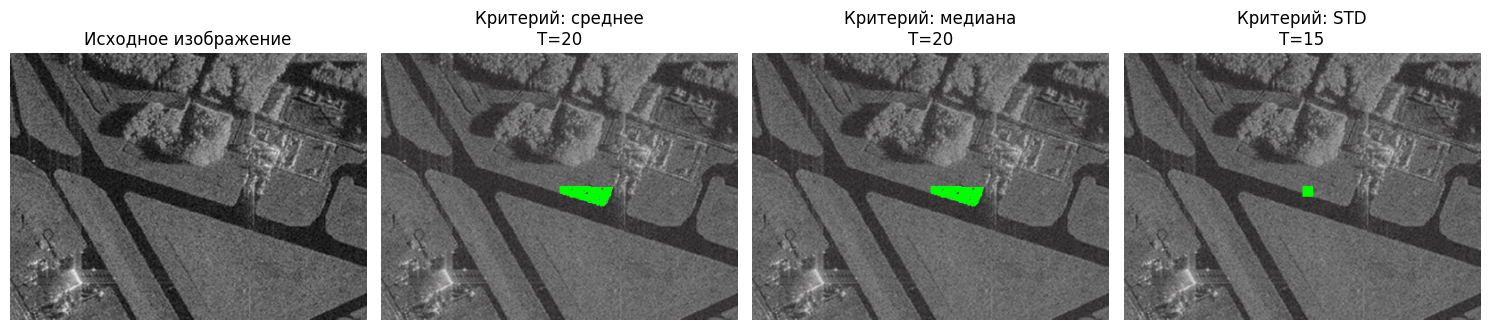


СРАВНИТЕЛЬНАЯ СТАТИСТИКА:
----------------------------------------
Критерий 'среднее': 890 пикселей
Критерий 'медиана': 894 пикселей
Критерий 'STD':     144 пикселей

АНАЛИЗ РЕЗУЛЬТАТОВ:
----------------------------------------
1. Критерий СРЕДНЕЕ:
   - Чувствителен к выбросам
   - Может захватывать посторонние объекты
   - Быстрое вычисление

2. Критерий МЕДИАНА:
   - Устойчив к выбросам
   - Более точные границы региона
   - Медленнее вычисляется

3. Критерий STD (стандартное отклонение):
   - Контролирует однородность региона
   - Предотвращает включение неоднородных областей
   - Требует подбора параметра T

ВЫВОД: Критерий на основе медианы показывает лучшую устойчивость
к шуму и выбросам по сравнению с критерием среднего значения.


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

print("="*50)
print("ЛАБОРАТОРНАЯ РАБОТА ПО ОБРАБОТКЕ ИЗОБРАЖЕНИЙ #4")
print("="*50)
print(" ")

###2 ЗАДАНИЕ : Реализуйте вычисление критерия однородности, отличного от представленного. Сравните результаты.
print("="*5, " ЧАСТЬ 2 ", "="*5)
print("Реализуйте вычисление критерия однородности, отличного от представленного. Сравните результаты.")
print("-"*80)

# Загружаем изображение
image = cv2.imread("sar_1.jpg")
if image is None:
    raise FileNotFoundError("Файл sar_1.jpg не найден!")

# Переводим в серый
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# ИСХОДНЫЙ критерий однородности (среднее значение)
def homo_average(img, mask, point, T):
    region_vals = img[mask > 0]
    if len(region_vals) == 0:
        return True
    av_val = np.mean(region_vals)
    return abs(av_val - img[point]) <= T

# НОВЫЙ критерий однородности (медиана)
def homo_median(img, mask, point, T):
    """Критерий на основе медианы региона"""
    region_vals = img[mask > 0]
    if len(region_vals) == 0:
        return True
    median_val = np.median(region_vals)
    return abs(median_val - img[point]) <= T

# ЕЩЕ ОДИН критерий (стандартное отклонение)
def homo_std(img, mask, point, T):
    """Критерий на основе стандартного отклонения региона"""
    region_vals = img[mask > 0]
    if len(region_vals) < 2:
        return True

    std_val = np.std(region_vals)
    mean_val = np.mean(region_vals)

    # Проверяем, не увеличит ли новый пиксель дисперсию слишком сильно
    new_region_vals = np.append(region_vals, img[point])
    new_std = np.std(new_region_vals)

    return new_std <= T

def region_growing(image, seed_point, homo_fun, r, T):
    mask = np.zeros(image.shape, np.uint8)
    mask[seed_point] = 1
    count = 1
    while count > 0:
        count = 0
        local_mask = np.zeros(image.shape, np.uint8)
        for i in range(r, image.shape[0] - r):
            for j in range(r, image.shape[1] - r):
                if mask[i, j] == 0 and mask[i - r:i + r, j - r:j + r].sum() > 0:
                    if homo_fun(image, mask, (i, j), T):
                        local_mask[i, j] = 1
        count = np.count_nonzero(local_mask)
        mask += local_mask
    return mask * 255

# Сравнение трех критериев
plt.figure(figsize=(15, 5))

# Затравка в области газона
seed_point = (150, 200)

# 1. Исходный критерий (среднее значение)
region1 = region_growing(gray, seed_point, homo_average, r=1, T=20)

# 2. Новый критерий (медиана)
region2 = region_growing(gray, seed_point, homo_median, r=1, T=20)

# 3. Критерий стандартного отклонения
region3 = region_growing(gray, seed_point, homo_std, r=1, T=15)

# Визуализация
plt.subplot(1, 4, 1)
plt.imshow(gray, cmap='gray')
plt.title('Исходное изображение')
plt.axis('off')

plt.subplot(1, 4, 2)
result1 = image.copy()
result1[region1 > 0] = [0, 255, 0]
plt.imshow(cv2.cvtColor(result1, cv2.COLOR_BGR2RGB))
plt.title('Критерий: среднее\nT=20')
plt.axis('off')

plt.subplot(1, 4, 3)
result2 = image.copy()
result2[region2 > 0] = [0, 255, 0]
plt.imshow(cv2.cvtColor(result2, cv2.COLOR_BGR2RGB))
plt.title('Критерий: медиана\nT=20')
plt.axis('off')

plt.subplot(1, 4, 4)
result3 = image.copy()
result3[region3 > 0] = [0, 255, 0]
plt.imshow(cv2.cvtColor(result3, cv2.COLOR_BGR2RGB))
plt.title('Критерий: STD\nT=15')
plt.axis('off')

plt.tight_layout()
plt.show()

# Сравнительная статистика
print("\nСРАВНИТЕЛЬНАЯ СТАТИСТИКА:")
print("-" * 40)
print(f"Критерий 'среднее': {np.count_nonzero(region1)} пикселей")
print(f"Критерий 'медиана': {np.count_nonzero(region2)} пикселей")
print(f"Критерий 'STD':     {np.count_nonzero(region3)} пикселей")

print("\nАНАЛИЗ РЕЗУЛЬТАТОВ:")
print("-" * 40)
print("1. Критерий СРЕДНЕЕ:")
print("   - Чувствителен к выбросам")
print("   - Может захватывать посторонние объекты")
print("   - Быстрое вычисление")

print("\n2. Критерий МЕДИАНА:")
print("   - Устойчив к выбросам")
print("   - Более точные границы региона")
print("   - Медленнее вычисляется")

print("\n3. Критерий STD (стандартное отклонение):")
print("   - Контролирует однородность региона")
print("   - Предотвращает включение неоднородных областей")
print("   - Требует подбора параметра T")

print("\nВЫВОД: Критерий на основе медианы показывает лучшую устойчивость")
print("к шуму и выбросам по сравнению с критерием среднего значения.")